In [89]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1 : Integration: Trapezoid and Midpoint ###



The exact value of the integral is 2.328423e-01
With 50 partitions:
The midpoint estimate is 2.327178e-01
The Trapezoid estimate is 2.334008e-01


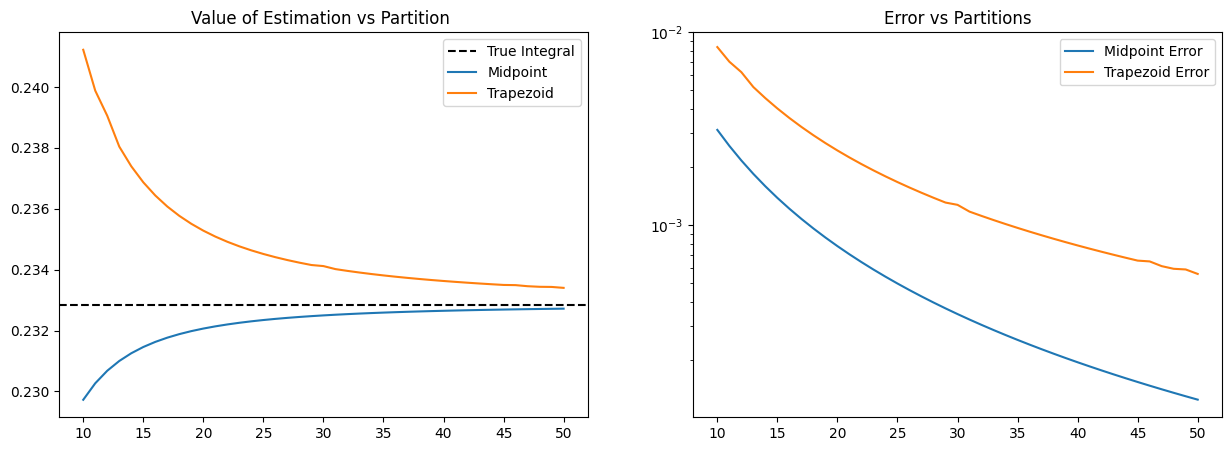

In [80]:
def f(x):
    return np.cos(2*x)*np.exp(-3*x)

def midpoint(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    h = (b-a)/n
    sum = 0
    x = np.arange(a, b+h, h)

    for i in range(n):
        sum += f((x[i]+x[i+1]) / 2)

    return sum * h

def trapezoid(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 
    h = (b-a)/n
    x = np.arange(a, b+h, h)
    sum = f(x[0])+f(x[-1])

    for i in range(1,n-1):
        sum += 2*f((x[i]))
    
    return (h/2)*sum 

def partvsval(Iestimator):
    numParts = np.linspace(10,50, 41)
    estimates = []

    for bins in range(10,51):
        estimates.append(Iestimator(f, bins, 0, np.pi/2))

    return (numParts, estimates)


exactI = (3/13)*(1+np.exp(-3*np.pi/2))

midData = partvsval(midpoint)
trapData = partvsval(trapezoid)

bins = midData[0]

print(f'The exact value of the integral is {exactI:.6e}')
print(f'With {bins[-1]:.0f} partitions:')
print(f'The midpoint estimate is {midData[1][-1]:.6e}')
print(f'The Trapezoid estimate is {trapData[1][-1]:.6e}')


sums, sumplots = plt.subplots(1,2)
sums.set_figwidth(15, True)
sums.set_figheight(5, True)

estimations = sumplots[0]
errors = sumplots[1]

estimations.axhline(y = exactI, label = 'True Integral', color = 'black', linestyle = 'dashed')
estimations.plot(midData[0], midData[1], label = 'Midpoint')
estimations.plot(trapData[0], trapData[1], label = 'Trapezoid')
estimations.set_title('Value of Estimation vs Partition ')
estimations.legend()

midPointErr = []
trapErr = []

for i in range(len(midData[1])):
    midPointErr.append(abs(exactI-midData[1][i]))
    trapErr.append(abs(exactI - trapData[1][i]))

errors.semilogy(bins, midPointErr, label= 'Midpoint Error')
errors.semilogy(bins, trapErr, label = 'Trapezoid Error')
errors.set_ylim(top = 1e-2)
errors.set_title('Error vs Partitions')
errors.legend()

plt.show()

### Problem 2: Integration: Gauss-Legendre ###

In [91]:
def func(x):
    return 2000*np.log(110000/(110000-1600*x)) - 9.8*x

# Weights/points
def gaussLegend(a, b, n):
    p4w = [[-.8611363116, -.3399810436, .3399810436, .8611363116],[0.3478548451, .6521451549, .6521451549,.3478548451]]
    p6w = [[-.9324695142, -.6612093865, -.2386191861, .2386191861, .6612093865,.9324695142],
           [.1713244924, .3607615730, .4679139346, .4679139346, .3607615730, .1713244924]]
    p8w = [[-0.1834346424956498, 0.1834346424956498,-0.5255324099163290,.5255324099163290, -0.7966664774136267, 0.7966664774136267, -0.9602898564975363,0.9602898564975363],
           [0.3626837833783620,0.3626837833783620,0.3137066458778873,0.3137066458778873,0.2223810344533745,0.2223810344533745,0.1012285362903763,0.1012285362903763]]

    sum = 0 
    if n == 4:
        p = p4w[0]
        w = p4w[1]
        for i in range(4):
            t = 0.5 * (p[i]+1)*(b-a) + a
            sum += func(t)*w[i]
    elif n == 6:
        p = p6w[0]
        w = p6w[1]
        for i in range(6):
            t = 0.5 * (p[i]+1)*(b-a) + a
            sum += func(t)*w[i]
    elif n == 8:
        p = p8w[0]
        w = p8w[1]
        for i in range(8):
            t = 0.5 * (p[i]+1)*(b-a) + a
            sum += func(t)*w[i]
    
    return sum * (b-a) / 2

gl4 = gaussLegend(5, 30, 4)
gl6 = gaussLegend(5, 30, 6)
gl8 = gaussLegend(5, 30, 8)

fRow1 = "{:>7}         " * 3
fRow2 = "{:.5f}     " * 3
names = ['4 Point', '6 Point', '8 Point']
gls = [gl4, gl6, gl8]
print("Gauss Legendre:   " + fRow1.format(*names))
print("   Result:        " + fRow2.format(*gls))


Gauss Legendre:   4 Point         6 Point         8 Point         
   Result:        10905.39893     10905.39944     10905.39944     


### Problem 3: ODE: Euler ###

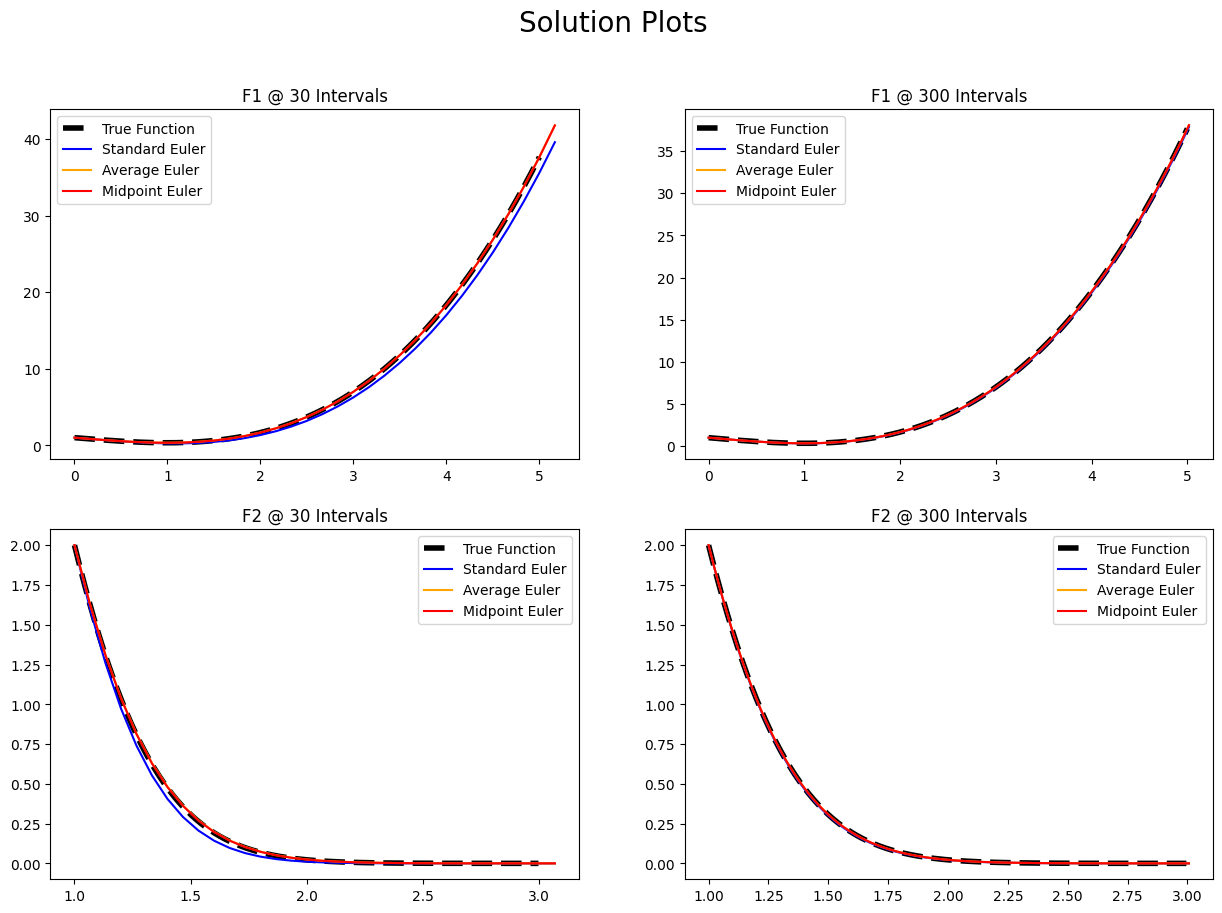

In [74]:
def ODE1(x, y, t=False):
    if t: 
        return (x**3)/3 - x + 1
    else:
        return x**2 - 1
    
def ODE2(x, y, t=False):
    if t: 
        return 2*np.exp((-3/2)*(x**2-1))
    else:  
        return -3*x*y


# the seemingly random 1.000000001 multiplier is because arange gave me rounding errors 
# at 300 intervals that made the y lists and x lists not match in size 
def standardEuler(df, a, b, start, n):
    # df: differential equation 
    # [a,b] integration bounds 
    # n - # of intervals 
    # start - initial value 

    h = (b-a)/n
    xlist = np.arange(a, b + h*1.00000000001, h)
    ylist = [start]

    for i in range(n+1): 
        yold = ylist[i]
        ynew = yold + h*df(xlist[i], ylist[i])
        ylist.append(ynew)
    
    return (xlist, ylist)

def avgEuler(df, a, b, start, n):
    # df: differential equation 
    # [a,b] integration bounds 
    # n - # of intervals 
    # start - initial value 

    h = (b-a)/n
    xlist = np.arange(a, b + h*1.00000000001, h)
    ylist = [start]

    for i in range(n+1):
        x = xlist[i]
        y = ylist[i]
        tempynext = y + h * df(x, y) 
        ynext =  y + h*(df(x,y) + df(x+h, tempynext))/2

        ylist.append(ynext)

    return xlist, ylist

def midEuler(df, a, b, start, n):
    # df: differential equation 
    # [a,b] integration bounds 
    # n - # of intervals 
    # start - initial value 

    h = (b-a)/n
    xlist = np.arange(a, b + h*1.00000000001, h)
    ylist = [start]

    for i in range(n+1):
        x = xlist[i]
        y = ylist[i]

        tempynext = y + (h/2)*df(x,y)
        ynext = y + h*df(x+h/2, tempynext)

        ylist.append(ynext)

    return xlist, ylist


### FUNCTION 1 BEGINNING ###
ODE1xlist = np.linspace(0,5,500)
ODE1Real = ODE1(ODE1xlist, 0, True)

#
##### 30 Interval Solutions for Function 1 ##### 
#

# S = Standard ::: A = Average ::: M = Midpoint 
SODE1_30 = standardEuler(ODE1, 0, 5, 1, 30) # returns 2 lists (xvalues, yvalues)
AODE1_30 = avgEuler(ODE1, 0, 5, 1, 30)
MODE1_30 = midEuler(ODE1, 0, 5, 1, 30)

# s130x = SODE1_30[0]
# s130y = SODE1_30[1]

# len(s130y)
func1, plots = plt.subplots(2,2)

func1.suptitle('Solution Plots\n')
func1.set_figwidth(15, True)
func1.set_figheight(10, True)

plots1 = plots[0]

plots1[0].plot(ODE1xlist, ODE1Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plots1[0].plot(SODE1_30[0], SODE1_30[1], label = 'Standard Euler', c = 'b')
plots1[0].plot(AODE1_30[0], AODE1_30[1], label = 'Average Euler', c = 'orange')
plots1[0].plot(MODE1_30[0], MODE1_30[1], label = 'Midpoint Euler', c = 'red')
plots1[0].set_title('F1 @ 30 Intervals')
plots1[0].legend()


#
##### 300 Interval Solutions for Function 1 #####
#

# S = Standard ::: A = Average ::: M = Midpoint 
SODE1_300 = standardEuler(ODE1, 0, 5, 1, 300) # returns 2 lists (xvalues, yvalues)
AODE1_300 = avgEuler(ODE1, 0, 5, 1, 300)
MODE1_300 = midEuler(ODE1, 0, 5, 1, 300)

plots1[1].plot(ODE1xlist, ODE1Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plots1[1].plot(SODE1_300[0], SODE1_300[1], label = 'Standard Euler', c = 'b')
plots1[1].plot(AODE1_300[0], AODE1_300[1], label = 'Average Euler', c = 'orange')
plots1[1].plot(MODE1_300[0], MODE1_300[1], label = 'Midpoint Euler', c = 'red')
plots1[1].set_title('F1 @ 300 Intervals')
plots1[1].legend()


### FUNCTION 2 BEGINNING ###
ODE2xlist = np.arange(1,3,2/500)
ODE2Real = ODE2(ODE2xlist, 0, True)

plots2 = plots[1]
##### 30 Interval Solutions for Function 2 #####


SODE2_30 = standardEuler(ODE2, 1, 3, 2, 30) # returns 2 lists (xvalues, yvalues)
AODE2_30 = avgEuler(ODE2, 1, 3, 2, 30)
MODE2_30 = midEuler(ODE2, 1, 3, 2, 30)

plots2[0].plot(ODE2xlist, ODE2Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plots2[0].plot(SODE2_30[0], SODE2_30[1], label = 'Standard Euler', c = 'b')
plots2[0].plot(AODE2_30[0], AODE2_30[1], label = 'Average Euler', c = 'orange')
plots2[0].plot(MODE2_30[0], MODE2_30[1], label = 'Midpoint Euler', c = 'red')
plots2[0].set_title('F2 @ 30 Intervals')
plots2[0].legend()

##### 300 Interval Solutions for Function 2 ####
SODE2_300 = standardEuler(ODE2, 1, 3, 2, 300) # returns 2 lists (xvalues, yvalues)
AODE2_300 = avgEuler(ODE2, 1, 3, 2, 300)
MODE2_300 = midEuler(ODE2, 1, 3, 2, 300)

plots2[1].plot(ODE2xlist, ODE2Real, label = 'True Function', linewidth = 4, linestyle = '--', c = 'k')
plots2[1].plot(SODE2_300[0], SODE2_300[1], label = 'Standard Euler', c = 'b')
plots2[1].plot(AODE2_300[0], AODE2_300[1], label = 'Average Euler', c = 'orange')
plots2[1].plot(MODE2_300[0], MODE2_300[1], label = 'Midpoint Euler', c = 'red')
plots2[1].set_title('F2 @ 300 Intervals')
plots2[1].legend()
plt.rc('figure', titlesize=20)
plt.show()





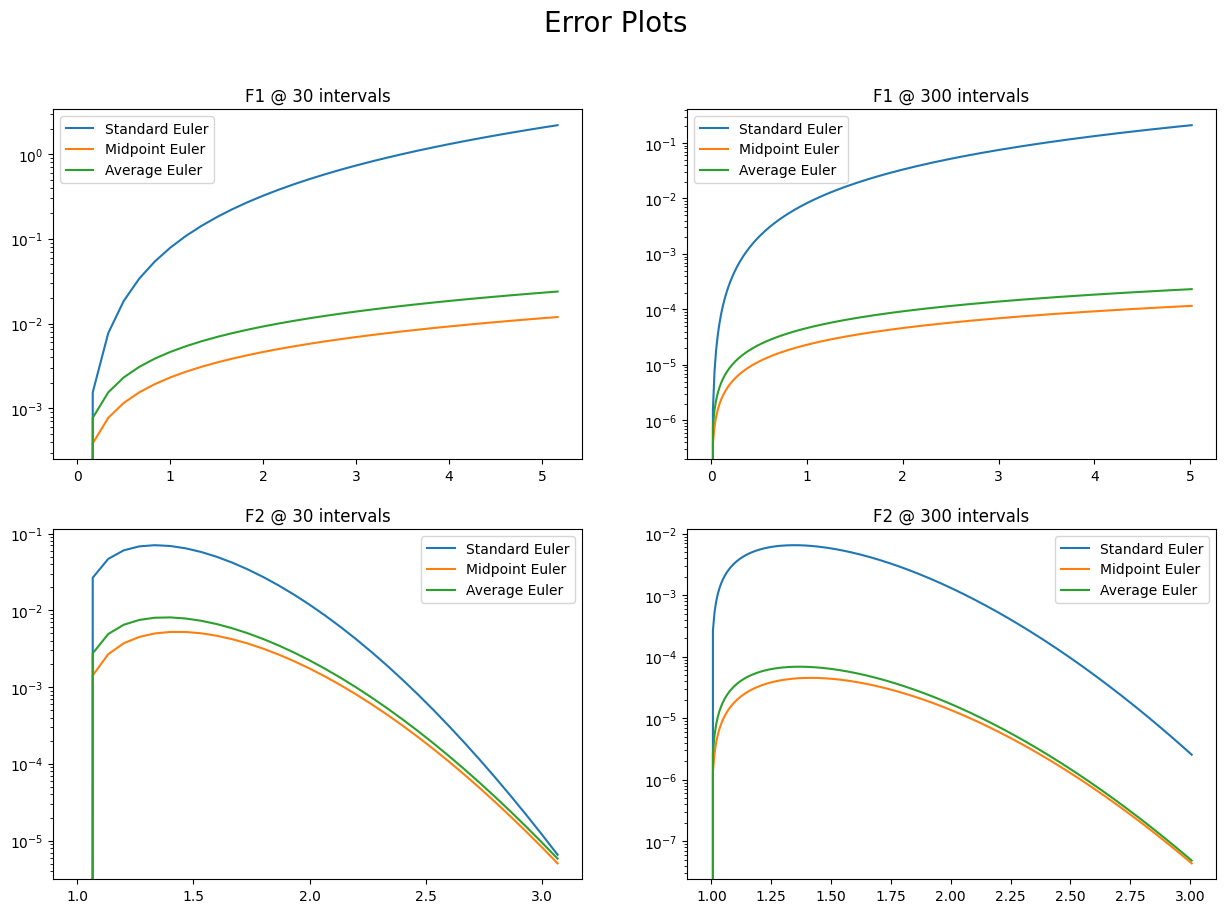

In [93]:
### Equation 1 Errors ### 
# Error Plots 
### Equation 1 ###
xlist130 = MODE1_30[0]
xlist1300 = SODE1_300[0]

ODE1True_30 = ODE1(xlist130, 0, True)
ODE1True_300 = ODE1(xlist1300, 0, True)

#Standard 
s130error = abs(SODE1_30[1]-ODE1True_30)
s1300error = abs(SODE1_300[1]-ODE1True_300)

#Average
a130error = abs(AODE1_30[1]-ODE1True_30)
a1300error = abs(AODE1_300[1]-ODE1True_300)

#Midpoint
m130error = abs(MODE1_30[1]-ODE1True_30)
m1300error = abs(MODE1_300[1]-ODE1True_300)

### Equation 2 ### 
xlist230 = MODE2_30[0]
xlist2300 = MODE2_300[0]

ODE2True_30 = ODE2(xlist230, 0, True)
ODE2True_300 = ODE2(xlist2300, 0, True)

#Standard 
s230error = abs(SODE2_30[1]-ODE2True_30)
s2300error = abs(SODE2_300[1]-ODE2True_300)

#Average 
a230error = abs(AODE2_30[1]-ODE2True_30)
a2300error = abs(AODE2_300[1]-ODE2True_300)

#Midpoint 
m230error = abs(MODE2_30[1]-ODE2True_30)
m2300error = abs(MODE2_300[1]-ODE2True_300)

ErrFig, ErrPlots = plt.subplots(2,2)
ErrFig.suptitle('Error Plots')
ErrFig.set_figwidth(15, True)
ErrFig.set_figheight(10, True)
plt.rc('figure', titlesize=40)

ErrPlots[0][0].semilogy(xlist130, s130error, label = 'Standard Euler')
ErrPlots[0][0].semilogy(xlist130, m130error, label = 'Midpoint Euler')
ErrPlots[0][0].semilogy(xlist130, a130error, label = 'Average Euler')
ErrPlots[0][0].legend()
ErrPlots[0][0].set_title('F1 @ 30 intervals')

ErrPlots[0][1].semilogy(xlist1300, s1300error, label = 'Standard Euler')
ErrPlots[0][1].semilogy(xlist1300, m1300error, label = 'Midpoint Euler')
ErrPlots[0][1].semilogy(xlist1300, a1300error, label = 'Average Euler')
ErrPlots[0][1].legend()
ErrPlots[0][1].set_title('F1 @ 300 intervals')

ErrPlots[1][0].semilogy(xlist230, s230error, label = 'Standard Euler')
ErrPlots[1][0].semilogy(xlist230, m230error, label = 'Midpoint Euler')
ErrPlots[1][0].semilogy(xlist230, a230error, label = 'Average Euler')
ErrPlots[1][0].legend()
ErrPlots[1][0].set_title('F2 @ 30 intervals')

ErrPlots[1][1].semilogy(xlist2300, s2300error, label = 'Standard Euler')
ErrPlots[1][1].semilogy(xlist2300, m2300error, label = 'Midpoint Euler')
ErrPlots[1][1].semilogy(xlist2300, a2300error, label = 'Average Euler')
ErrPlots[1][1].legend()
ErrPlots[1][1].set_title('F2 @ 300 intervals')

plt.rc('figure', titlesize=30)

plt.show()


### Problem 4: Runge-Kutta ###

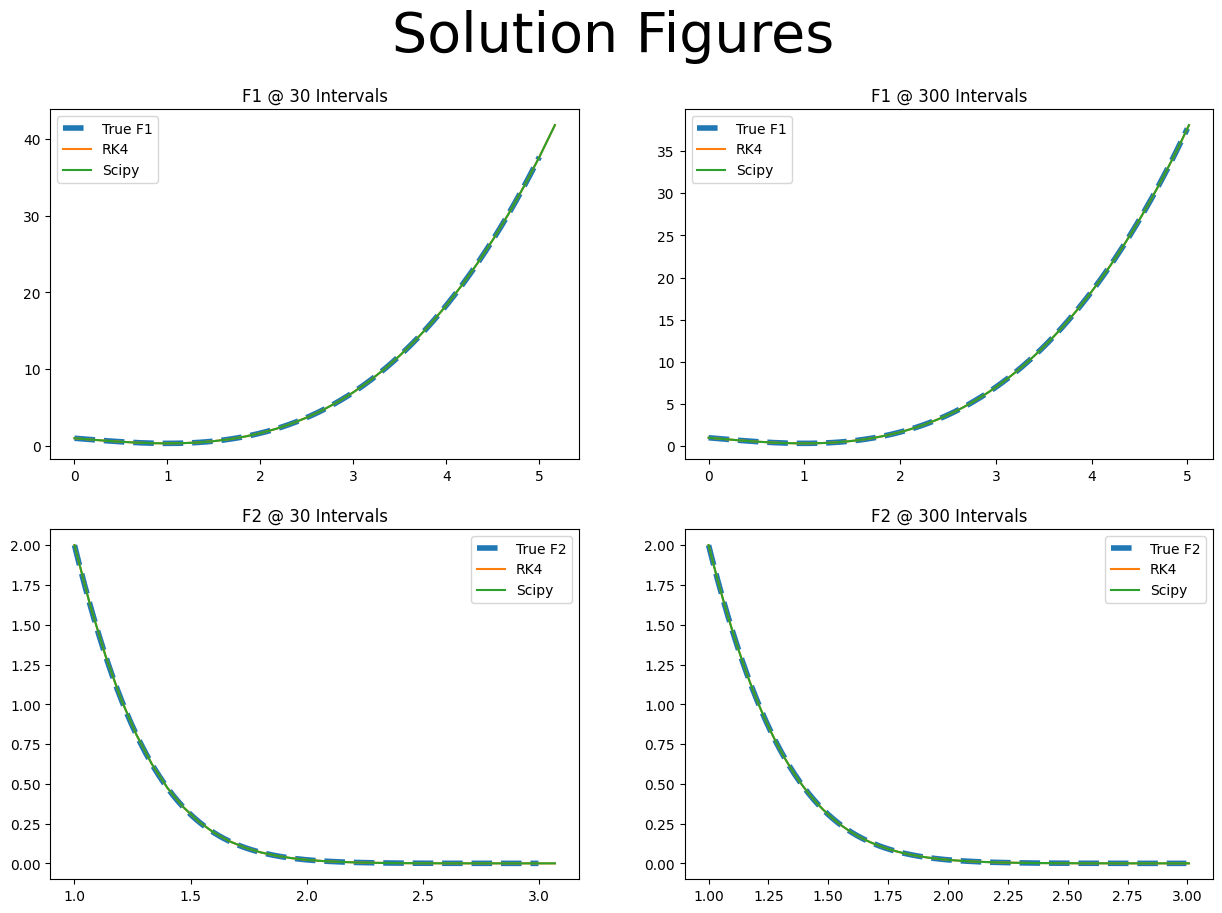

In [137]:
from scipy.integrate import solve_ivp as sivp

def RK4(f,IC,h,a,b):
  # Evenly-spaced time array
  t = np.arange(a,b+h*1.000001,h)

  # Initialize solution
  y = np.zeros_like(t)
  y[0] = IC
  for i in range(1,len(t)):
    f1 = f(t[i-1], y[i-1])
    f2 = f(t[i-1] + h/2, y[i-1] + h/2*f1)
    f3 = f(t[i-1] + h/2, y[i-1] + h/2*f2)
    f4 = f(t[i-1] + h, y[i-1] + h*f3)

    y[i] = y[i-1] + h*(1/6*f1 + 2/6*f2 + 2/6*f3 + 1/6*f4)

  return [t,y]

h130 = 5/30
h1300 = 5/300

h230 = 2/30
h2300 = 2/300

# RK1 Solutions 
RK_130 = RK4(ODE1,1,h130,0,5)[1]
RK_1300 = RK4(ODE1,1,h1300,0,5)[1]

# RK2 Solutions 
RK_230 = RK4(ODE2,2,h230,1,3)[1]
RK_2300 = RK4(ODE2,2,h2300,1,3)[1]

# scipy1 solutions 
sol130 = sivp(ODE1, (0,5 + h130),[1], t_eval= np.arange(0, 5 + h130,h130), max_step = 30).y[0]
sol1300 = sivp(ODE1, (0,5 + h1300*1.000001),[1], t_eval= np.arange(0,5 + h1300*1.000001,h1300), max_step = 300).y[0]

# scipy2 solutions
sol230 = sivp(ODE2, (1,3 + h230),[2], t_eval = np.arange(1,3 + h230, h230) ).y[0]
sol2300 = sivp(ODE2, (1,3+h2300*1.0000001),[2], t_eval = np.arange(1,3+h2300*1.000001,h2300) ).y[0]

SolFig, SolPlots = plt.subplots(2,2)

SolFig.suptitle('Solution Figures')

SolPlots[0][0].set_title('F1 @ 30 Intervals')
SolPlots[0][0].plot(ODE1xlist, ODE1Real, '--', linewidth = 4, label='True F1')
SolPlots[0][0].plot(xlist130, RK_130, label = 'RK4')
SolPlots[0][0].plot(xlist130, sol130, label = 'Scipy')

SolPlots[0][0].legend()

SolPlots[0][1].set_title('F1 @ 300 Intervals')
SolPlots[0][1].plot(ODE1xlist, ODE1Real, '--', linewidth = 4, label='True F1')
SolPlots[0][1].plot(xlist1300, RK_1300, label = 'RK4')
SolPlots[0][1].plot(xlist1300, sol1300, label = 'Scipy')

SolPlots[0][1].legend()

SolPlots[1][0].set_title('F2 @ 30 Intervals')
SolPlots[1][0].plot(ODE2xlist, ODE2Real, '--', linewidth = 4, label='True F2')
SolPlots[1][0].plot(xlist230, RK_230, label = 'RK4')
SolPlots[1][0].plot(xlist230, sol230, label = 'Scipy')
SolPlots[1][0].legend()

SolPlots[1][1].set_title('F2 @ 300 Intervals')
SolPlots[1][1].plot(ODE2xlist, ODE2Real, '--', linewidth = 4, label='True F2')
SolPlots[1][1].plot(xlist2300, RK_2300, label = 'RK4')
SolPlots[1][1].plot(xlist2300, sol2300, label = 'Scipy')
SolPlots[1][1].legend()


SolFig.set_figwidth(15, True)
SolFig.set_figheight(10, True)
plt.rc('figure', titlesize=40)
plt.show()


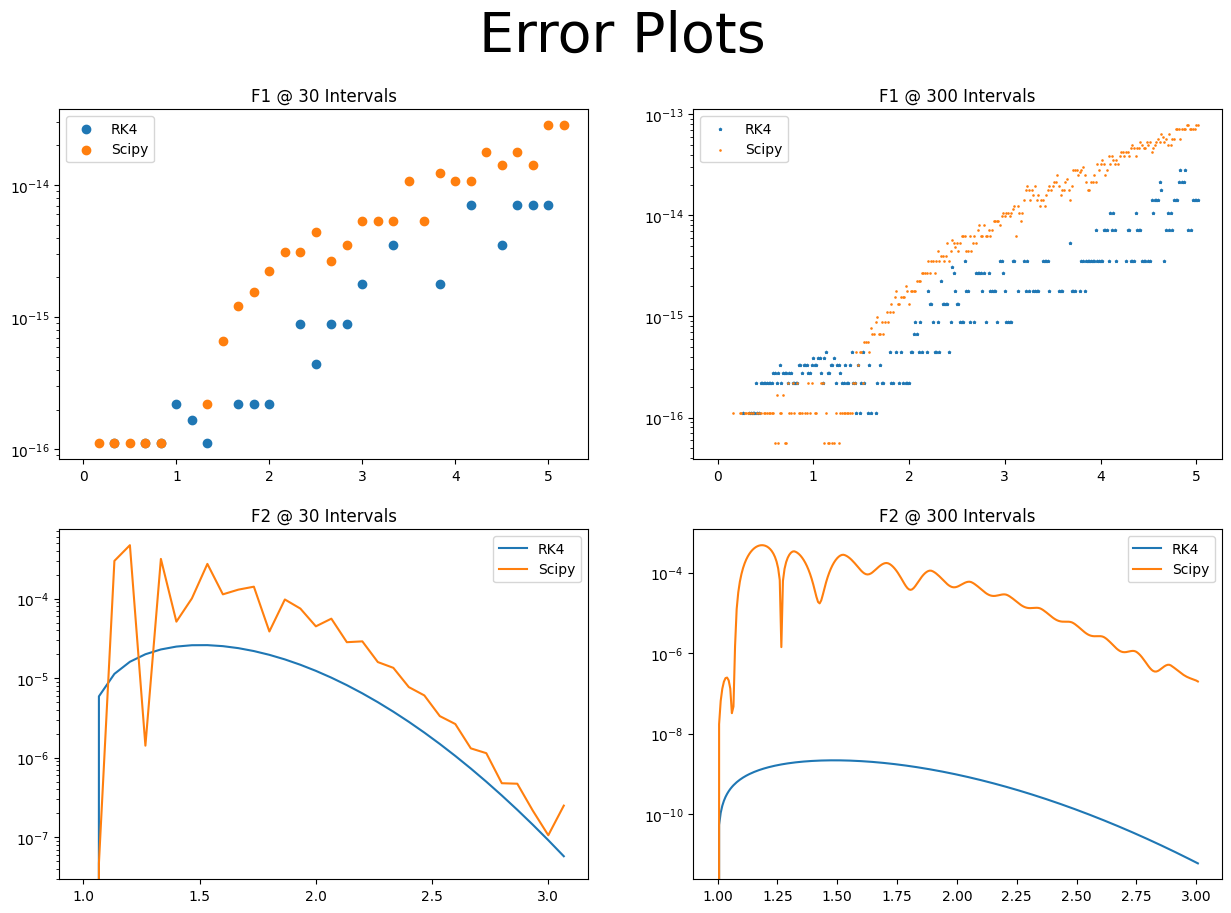

In [138]:
# RK1 ERRORS 
rk130E = abs(ODE1True_30-RK_130)
rk1300E = abs(ODE1True_300-RK_1300)

# RK2 ERRORS 
rk230E = abs(ODE2True_30-RK_230)
rk2300E = abs(ODE2True_300-RK_2300)

# scipy1 errors
scip130E = abs(ODE1True_30-sol130)
scip1300E = abs(ODE1True_300-sol1300)

# scipy2 Errors 
scip230E = abs(ODE2True_30-sol230)
scip2300E = abs(ODE2True_300-sol2300)

ErrFig, ErrPlots = plt.subplots(2,2)
ErrFig.suptitle('Error Plots')
ErrFig.set_figwidth(15)
ErrFig.set_figheight(10)

ErrPlots[0][0].set_title('F1 @ 30 Intervals')
ErrPlots[0][0].scatter(xlist130, rk130E, label = 'RK4')
ErrPlots[0][0].scatter(xlist130, scip130E, label = 'Scipy')
ErrPlots[0][0].legend()
ErrPlots[0][0].set_yscale('log')

ErrPlots[0][1].set_title('F1 @ 300 Intervals')
ErrPlots[0][1].scatter(xlist1300, rk1300E, label = 'RK4', marker = '*', s = 3)
ErrPlots[0][1].scatter(xlist1300, scip1300E, label = 'Scipy', marker = '.', s = 3)
ErrPlots[0][1].set_yscale('log')
ErrPlots[0][1].legend()

ErrPlots[1][0].set_title('F2 @ 30 Intervals')
ErrPlots[1][0].semilogy(xlist230, rk230E, label = 'RK4')
ErrPlots[1][0].semilogy(xlist230, scip230E, label = 'Scipy')
ErrPlots[1][0].legend()

ErrPlots[1][1].set_title('F2 @ 300 Intervals')
ErrPlots[1][1].semilogy(xlist2300, rk2300E, label = 'RK4')
ErrPlots[1][1].semilogy(xlist2300, scip2300E, label = 'Scipy')
ErrPlots[1][1].legend()

plt.show()